In [27]:
import pandas as pd 
import numpy as np
import os
import tarfile
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

In [28]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [29]:
X,y = mnist["data"],mnist["target"]

In [30]:
X.shape

(70000, 784)

In [31]:
y.shape

(70000,)

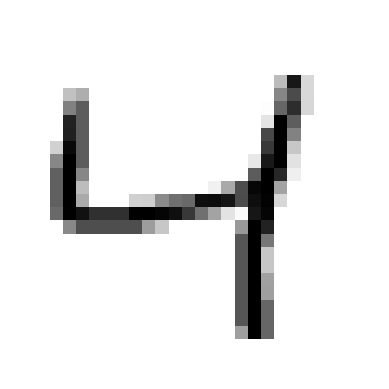

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.loc[2]
some_digit_image = some_digit.values.reshape(28,28)
plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [33]:
type(X)


pandas.core.frame.DataFrame

In [34]:
type(y)

pandas.core.series.Series

In [35]:
y[2]

'4'

In [36]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [37]:
y=y.astype(np.uint8)

In [38]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [39]:
# its a good practice to create test dataset right off the bat which can be used latter
# but here mnist dataset is already splitted into training and test dataset
# "training set first 60,000 images"
# " test set last 10,000 images"
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [40]:
# some model perform poorly when they get similiar instances in a row
# but in this case training data is already shuffled so we are good to go


In [41]:
# lets simplify the problem and create a model 'only five detector'
# it will include only 2 label '5' or'not 5'which can be represented by 0 and 1
y_train_5 = (y_train==5) #true for all 5,s and 0,s for rest
y_test_5 =(y_test==5)

In [42]:
# lets use  a classifier to train a model
# here we will be using stocasticgradientdescent SGD classifier 
# can train on large datasets and works on each instances independetly
# which makes it sutaible for online learning
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)


SGDClassifier(random_state=42)

In [43]:
# The SGDClassifier relies on randomness during training (hence
# the name “stochastic”). If you want reproducible results, you
# should set the random_state parameter.

In [44]:
sgd_clf.predict([some_digit])

C:\Users\Rishabh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

PERFORMANCE MEASURE


In [45]:
# performance measure on classification problems are bit trickier so we will spend a good amount of time learning on this topic


In [46]:
# measuring accuracy using cross_validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [49]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
 def fit(self, X, y=None):
     pass
 def predict(self, X):
     return np.zeros((len(X), 1), dtype=bool)
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# This demonstrates why accuracy is generally not the preferred performance measure
# for classifiers, especially when you are dealing with skewed datasets (i.e., when some
# classes are much more frequent than others).


array([0.91125, 0.90855, 0.90915])

In [50]:
# a much better way to evaluate the perfomance of classifier is to use confusion matrix
# but for confusion matrix we need some predictions tht can be compared to the target values
from sklearn.model_selection import cross_val_predict
y_train_pred= cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [52]:
# Just like the cross_val_score() function, cross_val_predict() performs K-fold
# cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test folds

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [55]:
# precision =    TP
#             TP + FP

In [56]:
# precision is typically used
# along with another metric named recall, also called sensitivity or true positive rate,this is the ratio of positive instances that are correctly detected by the classifier

In [57]:
# recall =    TP
#          TP + FN